In [ ]:
import pandas as pd
df=pd.read_csv('/content/cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [ ]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(398, 5)

In [ ]:
X_test.shape

(171, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[0.21482323, 0.17653027, 0.207864  , 0.11147402, 0.43937889],
       [0.28723555, 0.32465336, 0.26826066, 0.16275716, 0.25250519],
       [0.34166312, 0.3659114 , 0.33598231, 0.20144221, 0.33113659],
       ...,
       [0.48364807, 0.50084545, 0.48655933, 0.33336161, 0.49173964],
       [0.3336173 , 0.3902604 , 0.31787713, 0.19507953, 0.34368511],
       [0.28628899, 0.29455529, 0.26826066, 0.16131495, 0.335831  ]])

In [ ]:
X_test_new=sc.transform(X_test)
X_test_new

array([[0.36485399, 0.14440311, 0.37613157, 0.21743372, 0.45562878],
       [0.29291495, 0.30267163, 0.29154861, 0.16589608, 0.57028076],
       [0.28250272, 0.21339195, 0.27192316, 0.15703075, 0.43215672],
       [0.5361825 , 0.29996618, 0.51696496, 0.38069989, 0.30017153],
       [0.38567845, 0.67974298, 0.36569691, 0.24432662, 0.27597725],
       [0.43442662, 0.40006764, 0.43127635, 0.2826299 , 0.43486504],
       [0.57783142, 0.21068651, 0.57017483, 0.42990456, 0.3097409 ],
       [0.52529699, 0.41021305, 0.50867252, 0.37348887, 0.19030423],
       [0.16560178, 0.3432533 , 0.15845484, 0.0823754 , 0.49083687],
       [0.35728146, 0.14440311, 0.34600235, 0.212386  , 0.51701724],
       [0.19210564, 0.24078458, 0.18747841, 0.09743372, 0.49715627],
       [0.34118983, 0.47683463, 0.33916108, 0.19817603, 0.37916403],
       [0.43821288, 0.30639161, 0.44924331, 0.28063627, 0.48722578],
       [0.25457901, 0.29861346, 0.24338332, 0.13709438, 0.29015076],
       [0.36722041, 0.5312817 , 0.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9064327485380117


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.91      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



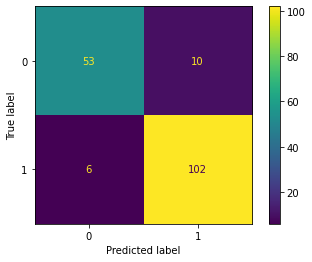

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#naivebayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_new,y_train)
y_pred_nb=nb.predict(X_test_new)
y_pred_nb


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)) 

0.9064327485380117


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.91      0.94      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



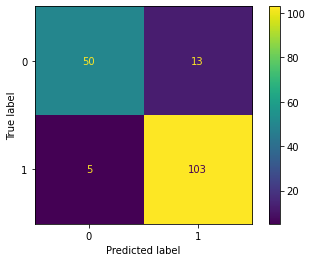

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))

In [ ]:
#svm
from sklearn.svm import SVC
sv=SVC(kernel='linear')
sv.fit(X_train_new,y_train)
y_pred_sv=sv.predict(X_test_new)
y_pred_sv


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
sv.predict(sc.transform([[18.5,19.8,130.1,516,.05]]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        63
           1       0.89      0.98      0.93       108

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171



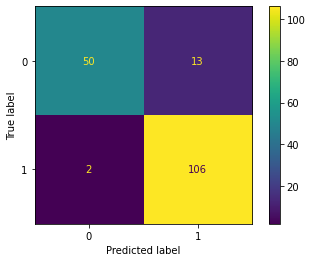

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_new,y_train)
y_pred_clf=clf.predict(X_test_new)
y_pred_clf

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        63
           1       0.86      0.92      0.89       108

    accuracy                           0.85       171
   macro avg       0.85      0.83      0.84       171
weighted avg       0.85      0.85      0.85       171



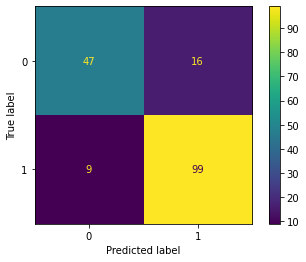

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_clf))

[Text(0.59375, 0.9545454545454546, 'mean_perimeter <= 0.38\nentropy = 0.954\nsamples = 398\nvalue = [149, 249]'),
 Text(0.34375, 0.8636363636363636, 'mean_perimeter <= 0.287\nentropy = 0.536\nsamples = 278\nvalue = [34, 244]'),
 Text(0.171875, 0.7727272727272727, 'mean_smoothness <= 0.425\nentropy = 0.148\nsamples = 189\nvalue = [4, 185]'),
 Text(0.140625, 0.6818181818181818, 'entropy = 0.0\nsamples = 121\nvalue = [0, 121]'),
 Text(0.203125, 0.6818181818181818, 'mean_texture <= 0.465\nentropy = 0.323\nsamples = 68\nvalue = [4, 64]'),
 Text(0.125, 0.5909090909090909, 'mean_smoothness <= 0.425\nentropy = 0.198\nsamples = 65\nvalue = [2, 63]'),
 Text(0.0625, 0.5, 'mean_texture <= 0.298\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03125, 0.4090909090909091, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09375, 0.4090909090909091, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1875, 0.5, 'mean_smoothness <= 0.613\nentropy = 0.118\nsamples = 63\nvalue = [1, 62]'),
 

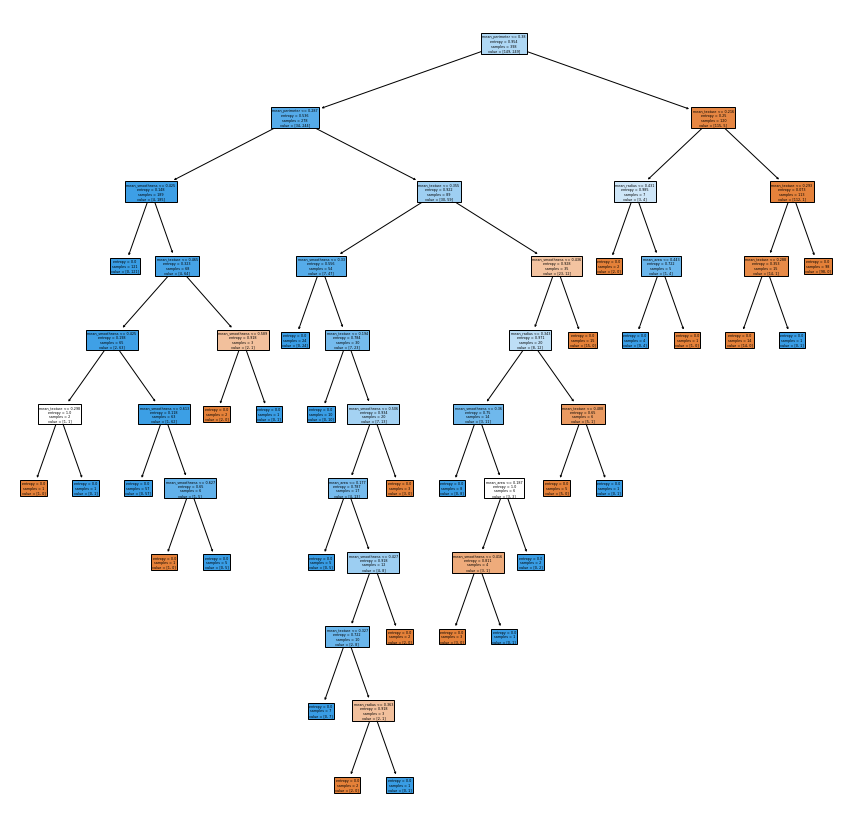

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'],filled=True)